# Temperature Analysis

## EXERCISE

Voici le fichier Excell. On y trouve des données de température de l'eau d'une rivière à quatre stations différentes avec la date et l'heure de la mesure.

SVP vous devez construire un programme qui :

Fait la lecture du fichier et produire les vecteurs des variables dates, heures, température 1, température 2, température 3, température 4.
Produit un graphique des séries chronologiques de température moyenne journalière à chaque station.
Calcule la moyenne et l'écart-type mensuel à chaque station et pour chaque mois. 

## IMPORT PACKAGES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# IMPORT DATA

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Exercise.xlsx')

In [ ]:
df

,Date time,1,2,3,4
0,2019-04-01 00:00:00.001,0.010,0.010,0.232,0.121
1,2019-04-01 00:30:00.001,0.010,0.010,0.343,0.121
2,2019-04-01 01:00:00.001,0.010,0.010,0.232,0.121
3,2019-04-01 01:30:00.001,0.010,0.010,0.232,0.121
4,2019-04-01 02:00:00.001,0.010,0.010,0.232,0.121
...,...,...,...,...,...
5851,2019-07-31 21:30:00.002,25.513,25.708,16.903,26.000
5852,2019-07-31 22:00:00.002,25.319,25.416,16.903,25.708
5853,2019-07-31 22:30:00.002,25.125,25.125,16.808,25.416
5854,2019-07-31 23:00:00.002,25.028,24.931,16.808,25.222


In [ ]:
df.head()

,Date time,1,2,3,4
0,2019-04-01 00:00:00.001,0.01,0.01,0.232,0.121
1,2019-04-01 00:30:00.001,0.01,0.01,0.343,0.121
2,2019-04-01 01:00:00.001,0.01,0.01,0.232,0.121
3,2019-04-01 01:30:00.001,0.01,0.01,0.232,0.121
4,2019-04-01 02:00:00.001,0.01,0.01,0.232,0.121


In [ ]:
df.rename(columns={"Date time": "Date_time"})


,Date_time,1,2,3,4
0,2019-04-01 00:00:00.001,0.010,0.010,0.232,0.121
1,2019-04-01 00:30:00.001,0.010,0.010,0.343,0.121
2,2019-04-01 01:00:00.001,0.010,0.010,0.232,0.121
3,2019-04-01 01:30:00.001,0.010,0.010,0.232,0.121
4,2019-04-01 02:00:00.001,0.010,0.010,0.232,0.121
...,...,...,...,...,...
5851,2019-07-31 21:30:00.002,25.513,25.708,16.903,26.000
5852,2019-07-31 22:00:00.002,25.319,25.416,16.903,25.708
5853,2019-07-31 22:30:00.002,25.125,25.125,16.808,25.416
5854,2019-07-31 23:00:00.002,25.028,24.931,16.808,25.222


# DATA PREPROCESSING

In [ ]:
df.shape

(5856, 5)

In [ ]:
df.isnull().sum()

Date time    0
1            0
2            0
3            0
4            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date time  5856 non-null   datetime64[ns]
 1   1          5856 non-null   float64       
 2   2          5856 non-null   float64       
 3   3          5856 non-null   float64       
 4   4          5856 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 228.9 KB


In [ ]:
df.describe()

,1,2,3,4
count,5856.000000,5856.000000,5856.000000,5856.000000
mean,12.911674,12.849669,9.511216,12.868476
std,8.817541,8.772978,5.272498,8.621763
min,0.010000,0.010000,0.121000,0.121000
25%,4.727000,4.727000,5.450000,4.727000
50%,14.038000,13.942000,10.063000,13.846000
75%,20.519000,20.234000,13.942000,20.329000
max,29.853000,30.255000,18.996000,28.953000


In [ ]:
df.rename(columns={"Date time": "Date_time"})


,Date_time,1,2,3,4
0,2019-04-01 00:00:00.001,0.010,0.010,0.232,0.121
1,2019-04-01 00:30:00.001,0.010,0.010,0.343,0.121
2,2019-04-01 01:00:00.001,0.010,0.010,0.232,0.121
3,2019-04-01 01:30:00.001,0.010,0.010,0.232,0.121
4,2019-04-01 02:00:00.001,0.010,0.010,0.232,0.121
...,...,...,...,...,...
5851,2019-07-31 21:30:00.002,25.513,25.708,16.903,26.000
5852,2019-07-31 22:00:00.002,25.319,25.416,16.903,25.708
5853,2019-07-31 22:30:00.002,25.125,25.125,16.808,25.416
5854,2019-07-31 23:00:00.002,25.028,24.931,16.808,25.222


DATA EXPLORATION & VISUALISATION

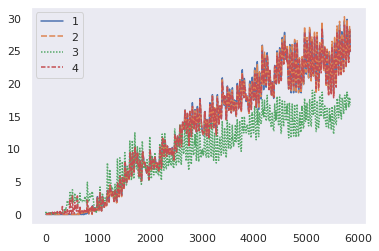

In [ ]:
sns.lineplot(data=df)

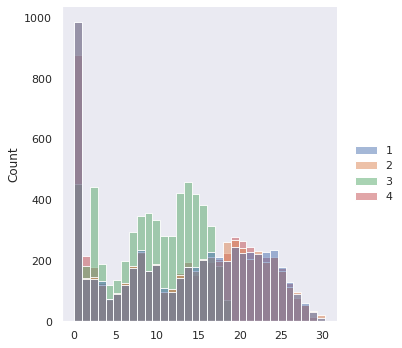

In [ ]:
sns.displot(data=df)

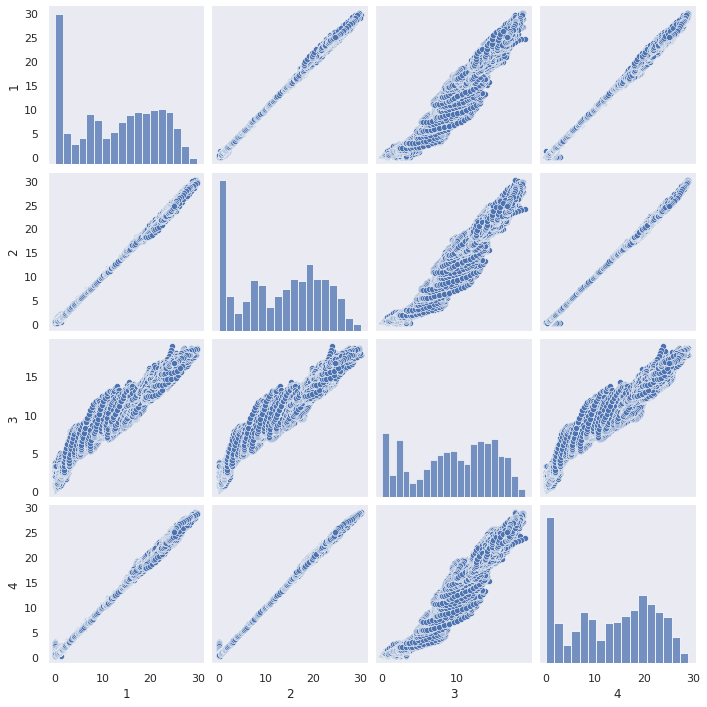

In [ ]:
sns.pairplot(data=df)

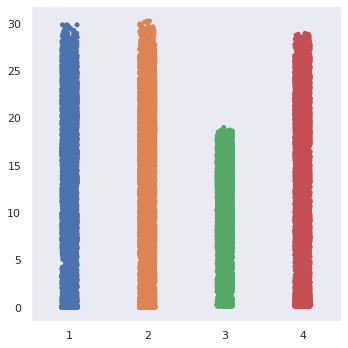

In [ ]:
# # Draw a nested barplot to show the temperatures
sns.catplot(data=df)

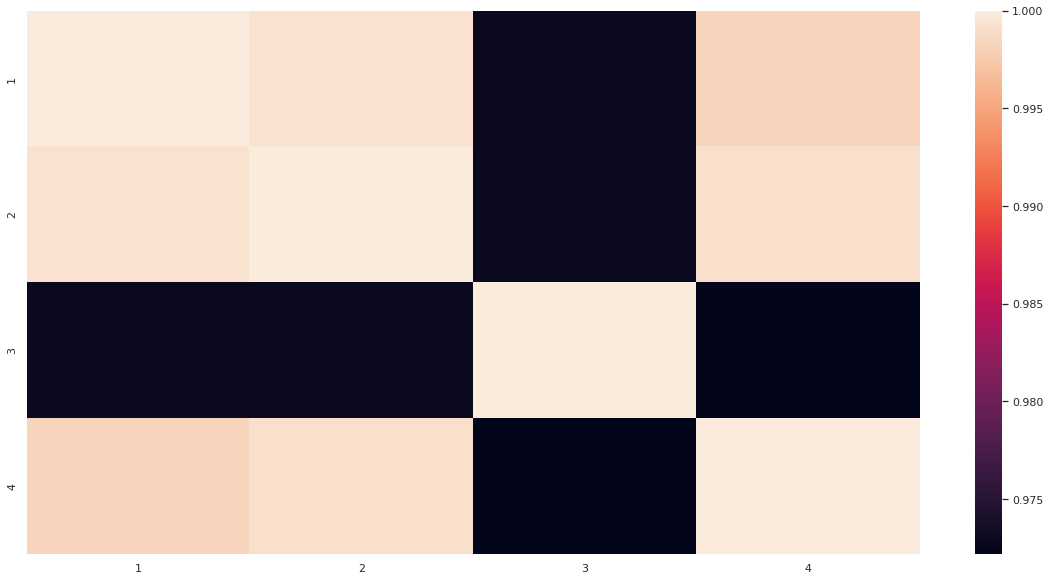

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

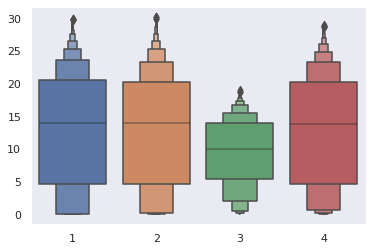

In [ ]:
sns.boxenplot(data=df)

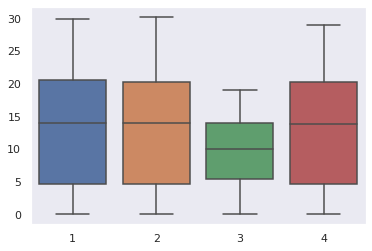

In [ ]:
sns.boxplot(data=df)

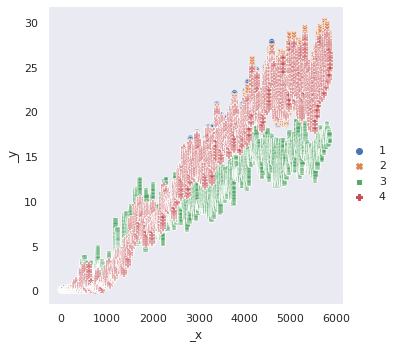

In [ ]:
sns.relplot(data=df)